<a href="https://colab.research.google.com/github/LinshenLiu622/LinshenCookieCompany.com/blob/UpdateText/ML%2BHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://jeageun@bitbucket.org/jeageun/mlcodesign.git
!pip install -U deepctr-torch
%cd ~
!wget http://www.example.com/filename


Cloning into 'mlcodesign'...
Unpacking objects: 100% (6/6), 201.93 MiB | 14.10 MiB/s, done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.0 MB/s eta 0:00:00
/root
--2023-09-21 17:02:43--  http://www.example.com/filename
Resolving www.example.com (www.example.com)... 93.184.216.34, 2606:2800:220:1:248:1893:25c8:1946
Connecting to www.example.com (www.example.com)|93.184.216.34|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-09-21 17:02:43 ERROR 404: Not Found.



In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import easydict

# argument parser
args = easydict.EasyDict({
"batch_size": 100,
"epochs": 10,
"lr": 0.001,
})

# Hyper Parameters
input_size = 784
num_classes = 10
num_epochs = args.epochs
batch_size = args.batch_size
learning_rate = args.lr

# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root ='./data',
        train = True,
        transform = transforms.ToTensor(),
        download = True)

test_dataset = dsets.MNIST(root ='./data',
        train = False,
        transform = transforms.ToTensor())

# Dataset Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
        batch_size = batch_size,
        shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
        batch_size = batch_size,
        shuffle = False)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes)

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        # (1)
        loss.backward()
        # (2)
        optimizer.step()
        # (3)

        if (i + 1) % 100 == 0:
            print('Epoch: [% d/% d], Step: [% d/% d], Loss: %.4f'
                    % (epoch + 1, num_epochs, i + 1,
                       len(train_dataset) // batch_size, loss.data.item()))

# Test the Model
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: % d %%' % (100 * correct / total))

100%|██████████| 9912422/9912422 [00:00<00:00, 79712467.23it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 45832649.95it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23803741.32it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6767505.78it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch: [ 1/ 10], Step: [ 100/ 600], Loss: 2.2335
Epoch: [ 1/ 10], Step: [ 200/ 600], Loss: 2.1558
Epoch: [ 1/ 10], Step: [ 300/ 600], Loss: 2.0445
Epoch: [ 1/ 10], Step: [ 400/ 600], Loss: 1.9524
Epoch: [ 1/ 10], Step: [ 500/ 600], Loss: 1.8678
Epoch: [ 1/ 10], Step: [ 600/ 600], Loss: 1.7827
Epoch: [ 2/ 10], Step: [ 100/ 600], Loss: 1.7656
Epoch: [ 2/ 10], Step: [ 200/ 600], Loss: 1.6844
Epoch: [ 2/ 10], Step: [ 300/ 600], Loss: 1.6204
Epoch: [ 2/ 10], Step: [ 400/ 600], Loss: 1.6435
Epoch: [ 2/ 10], Step: [ 500/ 600], Loss: 1.5746
Epoch: [ 2/ 10], Step: [ 600/ 600], Loss: 1.5091
Epoch: [ 3/ 10], Step: [ 100/ 600], Loss: 1.3762
Epoch: [ 3/ 10], Step: [ 200/ 600], Loss: 1.4243
Epoch: [ 3/ 10], Step: [ 300/ 600], Loss: 1.3297
Epoch: [ 3/ 10], Step: [ 400/ 600], Loss: 1.3635
Epoch: [ 3/ 10], Step: [ 500/ 600], Loss: 1.3050
Epoch: [ 3/ 10], Step: [ 600/ 600], Loss: 1.2361
Epoch: [ 4/ 10], Step: [ 100/ 600], Loss: 1

In [ ]:


#3.1 hook
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if args.dry_run:
                break


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=14, metavar='N',
                        help='number of epochs to train (default: 14)')
    parser.add_argument('--lr', type=float, default=1.0, metavar='LR',
                        help='learning rate (default: 1.0)')
    parser.add_argument('--gamma', type=float, default=0.7, metavar='M',
                        help='Learning rate step gamma (default: 0.7)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--no-mps', action='store_true', default=False,
                        help='disables macOS GPU training')
    parser.add_argument('--dry-run', action='store_true', default=False,
                        help='quickly check a single pass')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                        help='how many batches to wait before logging training status')
    parser.add_argument('--save-model', action='store_true', default=False,
                        help='For Saving the current Model')
    args = parser.parse_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()
    use_mps = not args.no_mps and torch.backends.mps.is_available()

    torch.manual_seed(args.seed)

    if use_cuda:
        device = torch.device("cuda")
    elif use_mps:
        device = torch.device("mps")
    else:
        device = torch.device("cpu")

    train_kwargs = {'batch_size': args.batch_size}
    test_kwargs = {'batch_size': args.test_batch_size}
    if use_cuda:
        cuda_kwargs = {'num_workers': 1,
                       'pin_memory': True,
                       'shuffle': True}
        train_kwargs.update(cuda_kwargs)
        test_kwargs.update(cuda_kwargs)

    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
    dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
    dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)
    train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
    test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

    model = Net().to(device)
    optimizer = optim.Adadelta(model.parameters(), lr=args.lr)

    scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()

    if args.save_model:
        torch.save(model.state_dict(), "mnist_cnn.pt")


if __name__ == '__main__':
    main()

usage: colab_kernel_launcher.py [-h] [--batch-size N] [--test-batch-size N]
                                [--epochs N] [--lr LR] [--gamma M] [--no-cuda]
                                [--no-mps] [--dry-run] [--seed S]
                                [--log-interval N] [--save-model]
colab_kernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-fea97fd5-055b-40a4-9e91-fa2e17bc88d5.json


SystemExit: ignored

In [ ]:
pip install -r requirements.txt
python main.py

SyntaxError: ignored

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import easydict
import torch.nn.functional as F

# argument parser
args = easydict.EasyDict({
    "batch_size": 100,
    "epochs": 10,
    "lr": 0.001,
    "enable_cuda": True,  # Set this to True to enable GPU training
    "checkpoint_path": 'model_checkpoint.pth'  # 保存模型的路径
})

# Check if GPU (CUDA) is available and if the flag is set
if args.enable_cuda and torch.cuda.is_available():
    device = torch.device("cuda")
    print("Training on GPU")
else:
    device = torch.device("cpu")
    print("Training on CPU")

# Hyper Parameters
input_size = 784
num_classes = 10
num_epochs = args.epochs
batch_size = args.batch_size
learning_rate = args.lr

# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes).to(device)  # Move model to the selected device

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Function to save model and optimizer state
def save_checkpoint(epoch):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, args.checkpoint_path)

# Function to load model and optimizer state
def load_checkpoint():
    checkpoint = torch.load(args.checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    return epoch, loss

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28)).to(device)  # Move images to the selected device
        labels = Variable(labels).to(device)  # Move labels to the selected device

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        # (1) regularize the loss function with L1
        for param in model.parameters():
         loss += 0.0001 * torch.sum(torch.abs(param))

        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1,
                     len(train_dataset) // batch_size, loss.item()))

    # Save model checkpoint at the end of each epoch
    save_checkpoint(epoch)

# Test the Model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28 * 28)).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))


Training on CPU
Epoch: [1/10], Step: [100/600], Loss: 2.2257
Epoch: [1/10], Step: [200/600], Loss: 2.1011
Epoch: [1/10], Step: [300/600], Loss: 2.0459
Epoch: [1/10], Step: [400/600], Loss: 1.9421
Epoch: [1/10], Step: [500/600], Loss: 1.9442
Epoch: [1/10], Step: [600/600], Loss: 1.8504
Epoch: [2/10], Step: [100/600], Loss: 1.7153
Epoch: [2/10], Step: [200/600], Loss: 1.6798
Epoch: [2/10], Step: [300/600], Loss: 1.6694
Epoch: [2/10], Step: [400/600], Loss: 1.5237
Epoch: [2/10], Step: [500/600], Loss: 1.5694
Epoch: [2/10], Step: [600/600], Loss: 1.6027
Epoch: [3/10], Step: [100/600], Loss: 1.5157
Epoch: [3/10], Step: [200/600], Loss: 1.3725
Epoch: [3/10], Step: [300/600], Loss: 1.3663
Epoch: [3/10], Step: [400/600], Loss: 1.3558
Epoch: [3/10], Step: [500/600], Loss: 1.3812
Epoch: [3/10], Step: [600/600], Loss: 1.2569
Epoch: [4/10], Step: [100/600], Loss: 1.2769
Epoch: [4/10], Step: [200/600], Loss: 1.1710
Epoch: [4/10], Step: [300/600], Loss: 1.1575
Epoch: [4/10], Step: [400/600], Loss: 1

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import easydict

# argument parser
args = easydict.EasyDict({
    "batch_size": 100,
    "epochs": 10,
    "lr": 0.001,
    "enable_cuda": True,  # Set this to True to enable GPU training
    "checkpoint_path": 'model_checkpoint.pth'  # 保存模型的路径
})

# Check if GPU (CUDA) is available and if the flag is set
if args.enable_cuda and torch.cuda.is_available():
    device = torch.device("cuda")
    print("Training on GPU")
else:
    device = torch.device("cpu")
    print("Training on CPU")

# Hyper Parameters
input_size = 784
num_classes = 10
num_epochs = args.epochs
batch_size = args.batch_size
learning_rate = args.lr

# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes).to(device)  # Move model to the selected device

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Function to load model and optimizer state
def load_checkpoint():
    checkpoint = torch.load(args.checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    return epoch, loss

# Load model checkpoint to continue training
start_epoch, start_loss = load_checkpoint()

# Training the Model (Continue from the saved checkpoint)
for epoch in range(start_epoch, num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28)).to(device)  # Move images to the selected device
        labels = Variable(labels).to(device)  # Move labels to the selected device

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1,
                     len(train_dataset) // batch_size, loss.item()))

    # Save model checkpoint at the end of each epoch
    save_checkpoint(epoch)

# Test the Model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28 * 28)).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))


Training on CPU
Epoch: [10/10], Step: [100/600], Loss: 0.8110
Epoch: [10/10], Step: [200/600], Loss: 0.7185
Epoch: [10/10], Step: [300/600], Loss: 0.8716
Epoch: [10/10], Step: [400/600], Loss: 0.6687
Epoch: [10/10], Step: [500/600], Loss: 0.7592
Epoch: [10/10], Step: [600/600], Loss: 0.7247
Accuracy of the model on the 10000 test images: 85 %


In [ ]:
# question3
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class MNISTConvNet(nn.Module):

    def __init__(self):
        # this is the place where you instantiate all your modules
        # you can later access them using the same names you've given them in
        # here
        super(MNISTConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    # it's the forward function that defines the network structure
    # we're accepting only a single input in here, but if you want,
    # feel free to use more


    def forward(self, input):
        x = self.pool1(F.relu(self.conv1(input)))
        x = self.pool2(F.relu(self.conv2(x)))

        # in your model definition you can go full crazy and use arbitrary
        # python code to define your model structure
        # all these are perfectly legal, and will be handled correctly
        # by autograd:
        # if x.gt(0) > x.numel() / 2:
        #      ...
        #
        # you can even do a loop and reuse the same module inside it
        # modules no longer hold ephemeral state, so you can use them
        # multiple times during your forward pass
        # while x.norm(2) < 10:
        #    x = self.conv1(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
net = MNISTConvNet()
print(net)
input = Variable(torch.randn(1, 1, 28, 28))
out = net(input)
print(out.size())
target = Variable(torch.LongTensor([3]))
loss_fn = nn.CrossEntropyLoss()  # LogSoftmax + ClassNLL Loss
err = loss_fn(out, target)
err.backward()

print(err)
print(net.conv1.weight.grad.size())
print(net.conv1.weight.data.norm())  # norm of the weight
print(net.conv1.weight.grad.data.norm())  # norm of the gradients

def printnorm(self, input, output):
    # input is a tuple of packed inputs
    # output is a Variable. output.data is the Tensor we are interested
    print('Inside ' + self.__class__.__name__ + ' forward')
    print('')
    print('input: ', type(input))
    print('input[0]: ', type(input[0]))
    print('output: ', type(output))
    print('')
    print('input size:', input[0].size())
    print('output size:', output.data.size())
    print('output norm:', output.data.norm())


net.conv2.register_forward_hook(printnorm)

out = net(input)

def printgradnorm(self, grad_input, grad_output):
    print('Inside ' + self.__class__.__name__ + ' backward')
    print('Inside class:' + self.__class__.__name__)
    print('')
    print('grad_input: ', type(grad_input))
    print('grad_input[0]: ', type(grad_input[0]))
    print('grad_output: ', type(grad_output))
    print('grad_output[0]: ', type(grad_output[0]))
    print('')
    print('grad_input size:', grad_input[0].size())
    print('grad_output size:', grad_output[0].size())
    print('grad_input norm:', grad_input[0].data.norm())


net.conv2.register_backward_hook(printgradnorm)

out = net(input)
err = loss_fn(out, target)
err.backward()

MNISTConvNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)
torch.Size([1, 10])
tensor(2.3542, grad_fn=<NllLossBackward0>)
torch.Size([10, 1, 5, 5])
tensor(1.9024)
tensor(0.4669)
Inside Conv2d forward

input:  <class 'tuple'>
input[0]:  <class 'torch.Tensor'>
output:  <class 'torch.Tensor'>

input size: torch.Size([1, 10, 12, 12])
output size: torch.Size([1, 20, 8, 8])
output norm: tensor(13.2780)
Inside Conv2d forward

input:  <class 'tuple'>
input[0]:  <class 'torch.Tensor'>
output:  <class 'torch.Tensor'>

input size: torch.Size([1, 10, 12, 12])
output size: torch.Size([1, 20, 8, 8])
output norm: tensor(13.2780)
Inside 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import easydict
import torch.nn.functional as F

# argument parser
args = easydict.EasyDict({
    "batch_size": 100,
    "epochs": 10,
    "lr": 0.001,
    "enable_cuda": True,  # Set this to True to enable GPU training
    "checkpoint_path": 'model_checkpoint.pth'  # 保存模型的路径
})

# Check if GPU (CUDA) is available and if the flag is set
if args.enable_cuda and torch.cuda.is_available():
    device = torch.device("cuda")
    print("Training on GPU")
else:
    device = torch.device("cpu")
    print("Training on CPU")

# Hyper Parameters
input_size = 784
num_classes = 10
num_epochs = args.epochs
batch_size = args.batch_size
learning_rate = args.lr

# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LogisticRegression(input_size, num_classes).to(device)  # Move model to the selected device

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Function to load model and optimizer state
def load_checkpoint():
    checkpoint = torch.load(args.checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    return epoch, loss

# Load model checkpoint to continue training
start_epoch, start_loss = load_checkpoint()

# Training the Model (Continue from the saved checkpoint)
for epoch in range(start_epoch, num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28)).to(device)  # Move images to the selected device
        labels = Variable(labels).to(device)  # Move labels to the selected device

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        # (1)
        for param in model.parameters():
         loss += 10 * torch.sum(torch.abs(param))

        loss.backward()
        # (2)
        optimizer.step()
        # (3)

        if (i + 1) % 100 == 0:
            print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1,
                     len(train_dataset) // batch_size, loss.item()))

    # Save model checkpoint at the end of each epoch
    save_checkpoint(epoch)

# Test the Model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28 * 28)).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))


Training on CPU
Epoch: [10/10], Step: [100/600], Loss: 380.6588
Epoch: [10/10], Step: [200/600], Loss: 382.5870
Epoch: [10/10], Step: [300/600], Loss: 383.8256
Epoch: [10/10], Step: [400/600], Loss: 383.3138
Epoch: [10/10], Step: [500/600], Loss: 382.4149
Epoch: [10/10], Step: [600/600], Loss: 382.2490
Accuracy of the model on the 10000 test images: 7 %


Epoch 1, Loss: 0.62691503227043
Epoch 2, Loss: 0.20387432366800207
Epoch 3, Loss: 0.14750700481712564
Epoch 4, Loss: 0.1174339385770722
Epoch 5, Loss: 0.10013570801527706
Epoch 6, Loss: 0.08860976991307205
Epoch 7, Loss: 0.08124709273698424
Epoch 8, Loss: 0.0756398309459056
Epoch 9, Loss: 0.07068456397918083
Epoch 10, Loss: 0.06683476483757134


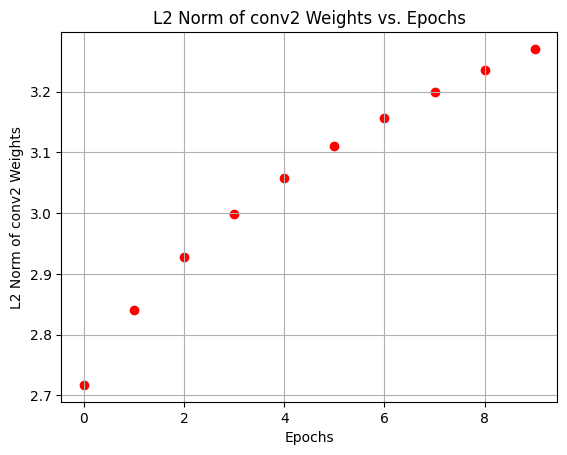

In [ ]:
#3.2

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model
class SimpleNet(nn.Module):
    def __init__(self, args):
        super(SimpleNet, self).__init__()
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1))
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=3, stride=1, padding=1))
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))
        self.lin1 = nn.Linear(7 * 7 * 16, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.lin1(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the model
net = SimpleNet(None)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 10
conv2_l2_norms = []

for epoch in range(num_epochs):
    running_loss = 0.0
    hook_handle = net.features.conv2.register_forward_hook(compute_conv2_l2_norm)  # Register the hook
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")
    hook_handle.remove()  # Remove the hook after each epoch
    plt.scatter(epoch, sum(conv2_l2_norms) / len(conv2_l2_norms), c='r', marker='o')

# Plot the L2 norm of 'conv2' weights
plt.xlabel('Epochs')
plt.ylabel('L2 Norm of conv2 Weights')
plt.title('L2 Norm of conv2 Weights vs. Epochs')
plt.grid(True)
plt.show()



In [ ]:
#3.3a

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the SimpleNet model with ReLU
class SimpleNetWithReLU(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithReLU, self).__init__()
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1))
        self.features.add_module("relu1", nn.ReLU())
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=3, stride=1, padding=1))
        self.features.add_module("relu2", nn.ReLU())
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))
        self.lin1 = nn.Linear(7 * 7 * 16, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.lin1(out)
        return out

# Define the SimpleNet model without ReLU
class SimpleNet(nn.Module):
    def __init__(self, args):
        super(SimpleNet, self).__init__()
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1))
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=3, stride=1, padding=1))
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))
        self.lin1 = nn.Linear(7 * 7 * 16, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.lin1(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the models
net_with_relu = SimpleNetWithReLU(None)
net_without_relu = SimpleNet(None)

# Define loss and optimizer for both models
criterion = nn.CrossEntropyLoss()
optimizer_with_relu = optim.SGD(net_with_relu.parameters(), lr=0.001, momentum=0.9)
optimizer_without_relu = optim.SGD(net_without_relu.parameters(), lr=0.001, momentum=0.9)

# Training loop for the model with ReLU
num_epochs = 10
conv2_l2_norms = []

for epoch in range(num_epochs):
    running_loss = 0.0
    hook_handle = net_with_relu.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_with_relu.zero_grad()

        outputs = net_with_relu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_with_relu.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss (with ReLU): {running_loss / len(trainloader)}")
    hook_handle.remove()

# Training loop for the model without ReLU
conv2_l2_norms = []

for epoch in range(num_epochs):
    running_loss = 0.0
    hook_handle = net_without_relu.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_without_relu.zero_grad()

        outputs = net_without_relu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_without_relu.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss (without ReLU): {running_loss / len(trainloader)}")
    hook_handle.remove()

# Evaluate both models on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

test_accuracy_with_relu = evaluate_model(net_with_relu, testloader)
test_accuracy_without_relu = evaluate_model(net_without_relu, testloader)

print("Test Accuracy (SimpleNet with ReLU):", test_accuracy_with_relu)
print("Test Accuracy (SimpleNet without ReLU):", test_accuracy_without_relu)


Epoch 1, Loss (with ReLU): 0.838465686458578
Epoch 2, Loss (with ReLU): 0.25109344745066753
Epoch 3, Loss (with ReLU): 0.1743732617695385
Epoch 4, Loss (with ReLU): 0.1298779000434826
Epoch 5, Loss (with ReLU): 0.10518958147511935
Epoch 6, Loss (with ReLU): 0.08975779668572964
Epoch 7, Loss (with ReLU): 0.07992944714259793
Epoch 8, Loss (with ReLU): 0.07384813861744696
Epoch 9, Loss (with ReLU): 0.06877779727702392
Epoch 10, Loss (with ReLU): 0.06451065702312218
Epoch 1, Loss (without ReLU): 0.5942483610435844
Epoch 2, Loss (without ReLU): 0.23642382372035656
Epoch 3, Loss (without ReLU): 0.17557084554834151
Epoch 4, Loss (without ReLU): 0.13895442598421914
Epoch 5, Loss (without ReLU): 0.11567890942533578
Epoch 6, Loss (without ReLU): 0.10067893495298684
Epoch 7, Loss (without ReLU): 0.08978277911444002
Epoch 8, Loss (without ReLU): 0.08164547435812224
Epoch 9, Loss (without ReLU): 0.07496130489942822
Epoch 10, Loss (without ReLU): 0.07015306140576154
Test Accuracy (SimpleNet with ReL

Epoch 1, Loss (with ReLU): 0.8867131680853839
Epoch 2, Loss (with ReLU): 0.19874681311963335
Epoch 3, Loss (with ReLU): 0.14189812886927808
Epoch 4, Loss (with ReLU): 0.11609603177760043
Epoch 5, Loss (with ReLU): 0.10108282466206564
Epoch 6, Loss (with ReLU): 0.09169104591365466
Epoch 7, Loss (with ReLU): 0.08452877873775246
Epoch 8, Loss (with ReLU): 0.07896390483567693
Epoch 9, Loss (with ReLU): 0.07434976844043573
Epoch 10, Loss (with ReLU): 0.07055671514272055
Epoch 1, Loss (without ReLU): 0.5471167551008052
Epoch 2, Loss (without ReLU): 0.1882266538507585
Epoch 3, Loss (without ReLU): 0.13802436422675785
Epoch 4, Loss (without ReLU): 0.1122274471452829
Epoch 5, Loss (without ReLU): 0.09716522530602939
Epoch 6, Loss (without ReLU): 0.08719624559194453
Epoch 7, Loss (without ReLU): 0.08014696181616755
Epoch 8, Loss (without ReLU): 0.07432131244610352
Epoch 9, Loss (without ReLU): 0.07010976150497866
Epoch 10, Loss (without ReLU): 0.06780349749323132
Test Accuracy (SimpleNet with Re

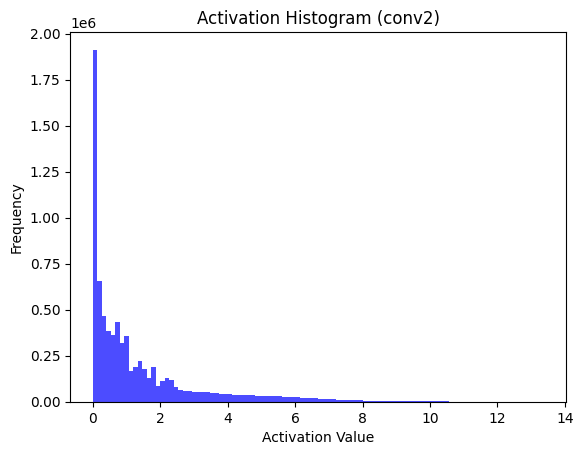

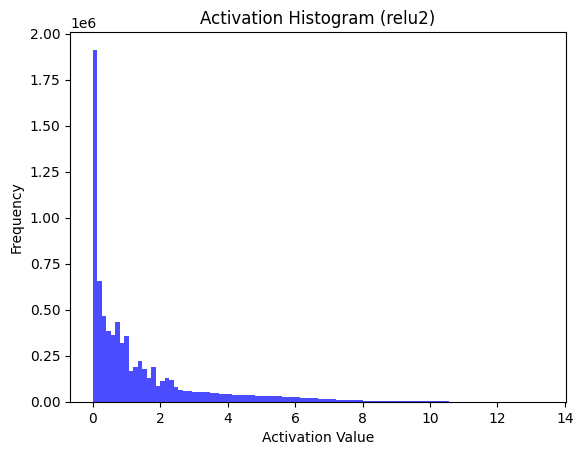

In [ ]:
#3.b
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the SimpleNet model with ReLU
class SimpleNetWithReLU(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithReLU, self).__init__()
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1))
        self.features.add_module("relu1", nn.ReLU())
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=3, stride=1, padding=1))
        self.features.add_module("relu2", nn.ReLU())
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))
        self.lin1 = nn.Linear(7 * 7 * 16, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.lin1(out)
        return out

# Define the SimpleNet model without ReLU
class SimpleNet(nn.Module):
    def __init__(self, args):
        super(SimpleNet, self).__init__()
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1))
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=3, stride=1, padding=1))
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))
        self.lin1 = nn.Linear(7 * 7 * 16, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.lin1(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the models
net_with_relu = SimpleNetWithReLU(None)
net_without_relu = SimpleNet(None)

# Define loss and optimizer for both models
criterion = nn.CrossEntropyLoss()
optimizer_with_relu = optim.SGD(net_with_relu.parameters(), lr=0.001, momentum=0.9)
optimizer_without_relu = optim.SGD(net_without_relu.parameters(), lr=0.001, momentum=0.9)

# Training loop for the model with ReLU
num_epochs = 10
conv2_l2_norms = []

for epoch in range(num_epochs):
    running_loss = 0.0
    hook_handle = net_with_relu.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_with_relu.zero_grad()

        outputs = net_with_relu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_with_relu.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss (with ReLU): {running_loss / len(trainloader)}")
    hook_handle.remove()

# Training loop for the model without ReLU
conv2_l2_norms = []

for epoch in range(num_epochs):
    running_loss = 0.0
    hook_handle = net_without_relu.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_without_relu.zero_grad()

        outputs = net_without_relu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_without_relu.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss (without ReLU): {running_loss / len(trainloader)}")
    hook_handle.remove()

# Evaluate both models on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

test_accuracy_with_relu = evaluate_model(net_with_relu, testloader)
test_accuracy_without_relu = evaluate_model(net_without_relu, testloader)

print("Test Accuracy (SimpleNet with ReLU):", test_accuracy_with_relu)
print("Test Accuracy (SimpleNet without ReLU):", test_accuracy_without_relu)

# Create a dataloader for visualization (you can modify this as needed)
visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Plot histograms of activations after conv2 and relu2 layers
plot_activation_histograms(net_with_relu, visualization_dataloader, 'conv2')
plot_activation_histograms(net_with_relu, visualization_dataloader, 'relu2')


Epoch 1, Loss (with Tanh): 0.9050664078833451
Epoch 2, Loss (with Tanh): 0.37282581927616204
Epoch 3, Loss (with Tanh): 0.3008026467568712
Epoch 4, Loss (with Tanh): 0.25756188880787223
Epoch 5, Loss (with Tanh): 0.22652592837238616
Epoch 6, Loss (with Tanh): 0.2031658754181633
Epoch 7, Loss (with Tanh): 0.18489268669552766
Epoch 8, Loss (with Tanh): 0.17000909362917643
Epoch 9, Loss (with Tanh): 0.15835314550633622
Epoch 10, Loss (with Tanh): 0.14845771317495338
Test Accuracy (SimpleNet with Tanh): 96.19


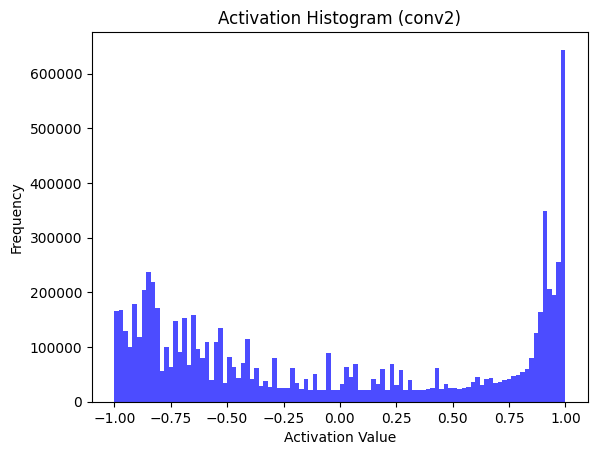

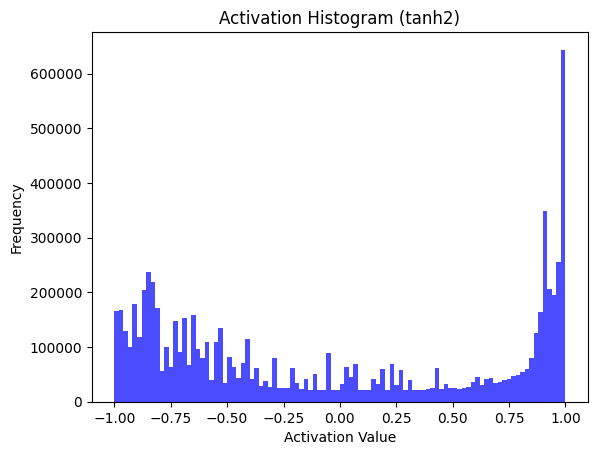

In [ ]:
#3.3c
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the SimpleNet model with Tanh activation
class SimpleNetWithTanh(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithTanh, self).__init__()
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1))
        self.features.add_module("tanh1", nn.Tanh())
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=3, stride=1, padding=1))
        self.features.add_module("tanh2", nn.Tanh())
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))
        self.lin1 = nn.Linear(7 * 7 * 16, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.lin1(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the models (with Tanh activation)
net_with_tanh = SimpleNetWithTanh(None)

# Define loss and optimizer for the model with Tanh activation
criterion = nn.CrossEntropyLoss()
optimizer_with_tanh = optim.SGD(net_with_tanh.parameters(), lr=0.001, momentum=0.9)

# Training loop for the model with Tanh activation
num_epochs = 10
conv2_l2_norms = []

for epoch in range(num_epochs):
    running_loss = 0.0
    hook_handle = net_with_tanh.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_with_tanh.zero_grad()

        outputs = net_with_tanh(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_with_tanh.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss (with Tanh): {running_loss / len(trainloader)}")
    hook_handle.remove()

# Evaluate the model with Tanh on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

test_accuracy_with_tanh = evaluate_model(net_with_tanh, testloader)

print("Test Accuracy (SimpleNet with Tanh):", test_accuracy_with_tanh)

# Create a dataloader for visualization (you can modify this as needed)
visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Plot histograms of activations after conv2 and tanh2 layers
plot_activation_histograms(net_with_tanh, visualization_dataloader, 'conv2')
plot_activation_histograms(net_with_tanh, visualization_dataloader, 'tanh2')


100%|██████████| 9912422/9912422 [00:00<00:00, 34288228.34it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 73683512.06it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 47832372.41it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7113715.00it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Loss (with Tanh and BN): 0.3376615253616688
Epoch 2, Loss (with Tanh and BN): 0.11694875757084854
Epoch 3, Loss (with Tanh and BN): 0.08020267090243874
Epoch 4, Loss (with Tanh and BN): 0.06283276177980482
Epoch 5, Loss (with Tanh and BN): 0.05316998027185641
Epoch 6, Loss (with Tanh and BN): 0.04685496459546278
Epoch 7, Loss (with Tanh and BN): 0.04212612724095496
Epoch 8, Loss (with Tanh and BN): 0.03795395036494093
Epoch 9, Loss (with Tanh and BN): 0.03519461079533381
Epoch 10, Loss (with Tanh and BN): 0.031620641252887785
Test Accuracy (SimpleNet with Tanh and BN): 98.67


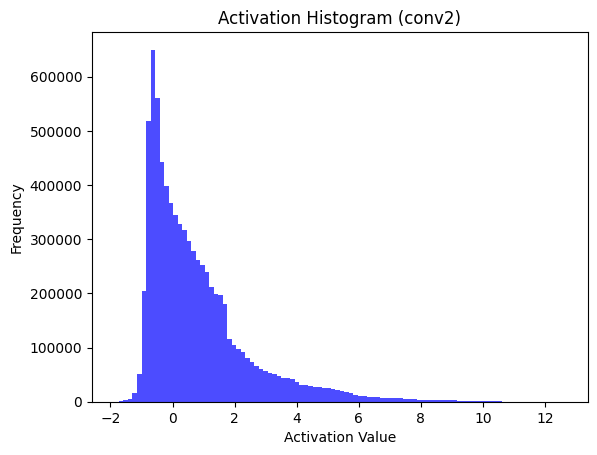

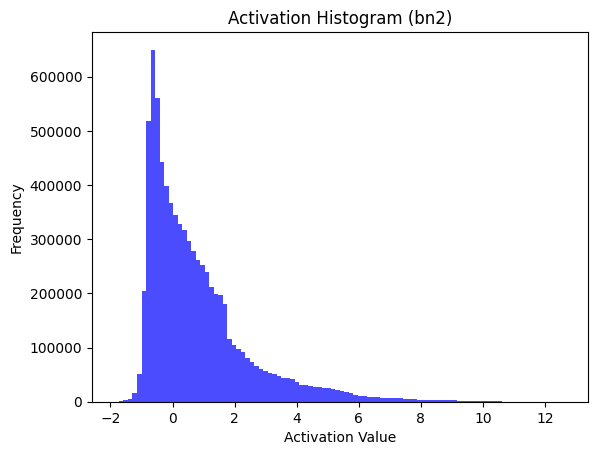

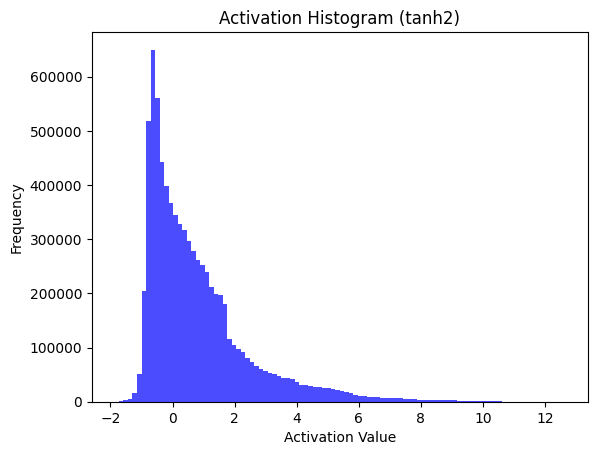

In [ ]:
#3.5
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model with Tanh activation and Batch Normalization
class SimpleNetWithTanhBN(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithTanhBN, self).__init__()
        self.kernel_sz = args['kernel_sz']
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh1", nn.Tanh())
        self.features.add_module("bn1", nn.BatchNorm2d(4))  # Batch Normalization after conv1
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh2", nn.Tanh())
        self.features.add_module("bn2", nn.BatchNorm2d(16))  # Batch Normalization after conv2
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))
        self.lin1 = nn.Linear(7 * 7 * 16, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.lin1(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the models (with Tanh activation and Batch Normalization)
args = {'kernel_sz': 7}  # Set your desired kernel size here (e.g., 3, 5, 7)
net_with_tanh_bn = SimpleNetWithTanhBN(args)

# Define loss and optimizer for the model with Tanh activation and Batch Normalization
criterion = nn.CrossEntropyLoss()
optimizer_with_tanh_bn = optim.SGD(net_with_tanh_bn.parameters(), lr=0.001, momentum=0.9)

# Training loop for the model with Tanh activation and Batch Normalization
num_epochs = 10
conv2_l2_norms = []

for epoch in range(num_epochs):
    running_loss = 0.0
    hook_handle = net_with_tanh_bn.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_with_tanh_bn.zero_grad()

        outputs = net_with_tanh_bn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_with_tanh_bn.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss (with Tanh and BN): {running_loss / len(trainloader)}")
    hook_handle.remove()

# Evaluate the model with Tanh and BN on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

test_accuracy_with_tanh_bn = evaluate_model(net_with_tanh_bn, testloader)

print("Test Accuracy (SimpleNet with Tanh and BN):", test_accuracy_with_tanh_bn)

# Create a dataloader for visualization (you can modify this as needed)
visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Plot histograms of activations after conv2, bn2, and tanh2 layers
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'conv2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'bn2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'tanh2')



In [ ]:
#3.6
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model with Tanh activation and Batch Normalization
class SimpleNetWithTanhBN(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithTanhBN, self).__init__()
        self.kernel_sz = args['kernel_sz']
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh1", nn.Tanh())
        self.features.add_module("bn1", nn.BatchNorm2d(4))  # Batch Normalization after conv1
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=1, stride=2))

        # Add conv2, tanh2, bn2, pool2 (Second layer)
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh2", nn.Tanh())
        self.features.add_module("bn2", nn.BatchNorm2d(16))
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=1, stride=2))

        # Add conv3, tanh3, bn3, pool3 (Third layer)
        self.features.add_module("conv3", nn.Conv2d(16, 64, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh3", nn.Tanh())
        self.features.add_module("bn3", nn.BatchNorm2d(64))
        self.features.add_module("pool3", nn.MaxPool2d(kernel_size=1, stride=2))

        # Add conv4, tanh4, bn4, pool4 (Fourth layer)
        self.features.add_module("conv4", nn.Conv2d(64, 256, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh4", nn.Tanh())
        self.features.add_module("bn4", nn.BatchNorm2d(256))
        self.features.add_module("pool4", nn.MaxPool2d(kernel_size=1, stride=2))

        self.features.add_module("conv5", nn.Conv2d(256, 1024, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh5", nn.Tanh())
        self.features.add_module("bn5", nn.BatchNorm2d(1024))
        self.features.add_module("pool5", nn.MaxPool2d(kernel_size=1, stride=2))

        # Adjust the input size for the linear layer

        self.lin1 = nn.Linear(1 * 1 * 1024, 10)  # 更新线性层的输入维度以匹配最后一层池化层的输出

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.lin1(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the models (with Tanh activation and Batch Normalization)
args = {'kernel_sz': 1}  # Set your desired kernel size here (e.g., 3, 5, 7)
net_with_tanh_bn = SimpleNetWithTanhBN(args)

# Define loss and optimizer for the model with Tanh activation and Batch Normalization
criterion = nn.CrossEntropyLoss()
optimizer_with_tanh_bn = optim.SGD(net_with_tanh_bn.parameters(), lr=0.001, momentum=0.9)

# Training loop for the model with Tanh activation and Batch Normalization
num_epochs = 10
conv2_l2_norms = []

for epoch in range(num_epochs):
    running_loss = 0.0
    hook_handle = net_with_tanh_bn.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_with_tanh_bn.zero_grad()

        outputs = net_with_tanh_bn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_with_tanh_bn.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss (with Tanh and BN): {running_loss / len(trainloader)}")
    hook_handle.remove()

# Evaluate the model with Tanh and BN on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

# Update testloader
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

test_accuracy_with_tanh_bn = evaluate_model(net_with_tanh_bn, testloader)

print("Test Accuracy (SimpleNet with Tanh and BN):", test_accuracy_with_tanh_bn)

# Create a dataloader for visualization (you can modify this as needed)
visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Plot histograms of activations after conv2, bn2, and tanh2 layers
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'conv2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'bn2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'tanh2')


Epoch 1, Loss (with Tanh and BN): 2.3068246653339246
Epoch 2, Loss (with Tanh and BN): 2.3052079921592274
Epoch 3, Loss (with Tanh and BN): 2.3055238225566805
Epoch 4, Loss (with Tanh and BN): 2.304543332758743
Epoch 5, Loss (with Tanh and BN): 2.3044803785616907
Epoch 6, Loss (with Tanh and BN): 2.3044075576989633
Epoch 7, Loss (with Tanh and BN): 2.3044810353565826
Epoch 8, Loss (with Tanh and BN): 2.303962772334817


KeyboardInterrupt: ignored

In [ ]:
#3.7
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model with Tanh activation and Batch Normalization
class SimpleNetWithTanhBN(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithTanhBN, self).__init__()
        self.kernel_sz = args['kernel_sz']
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh1", nn.Tanh())
        self.features.add_module("bn1", nn.BatchNorm2d(4))  # Batch Normalization after conv1
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv2, tanh2, bn2, pool2 (Second layer)
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh2", nn.Tanh())
        self.features.add_module("bn2", nn.BatchNorm2d(16))
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv3, tanh3, bn3, pool3 (Third layer)
        self.features.add_module("conv3", nn.Conv2d(16, 64, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh3", nn.Tanh())
        self.features.add_module("bn3", nn.BatchNorm2d(64))
        self.features.add_module("pool3", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv4, tanh4, bn4, pool4 (Fourth layer)
        self.features.add_module("conv4", nn.Conv2d(64, 256, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh4", nn.Tanh())
        self.features.add_module("bn4", nn.BatchNorm2d(256))
        self.features.add_module("pool4", nn.MaxPool2d(kernel_size=2, stride=2))

        # Adjust the input size for the linear layers
        self.fc1 = nn.Linear(1 * 1 * 256, 512)  # Adjusted input size
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)  # 10 output classes

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the models (with Tanh activation and Batch Normalization)
args = {'kernel_sz': 5}  # Set your desired kernel size here (e.g., 3, 5, 7)
net_with_tanh_bn = SimpleNetWithTanhBN(args)

# Define loss and optimizer for the model with Tanh activation and Batch Normalization
criterion = nn.CrossEntropyLoss()
optimizer_with_tanh_bn = optim.SGD(net_with_tanh_bn.parameters(), lr=0.001, momentum=0.9)

# Training loop for the model with Tanh activation and Batch Normalization
num_epochs = 10
conv2_l2_norms = []

for epoch in range(num_epochs):
    running_loss = 0.0
    hook_handle = net_with_tanh_bn.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_with_tanh_bn.zero_grad()

        outputs = net_with_tanh_bn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_with_tanh_bn.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss (with Tanh and BN): {running_loss / len(trainloader)}")
    hook_handle.remove()

# Evaluate the model with Tanh and BN on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

# Update testloader
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

test_accuracy_with_tanh_bn = evaluate_model(net_with_tanh_bn, testloader)

print("Test Accuracy (SimpleNet with Tanh and BN):", test_accuracy_with_tanh_bn)

# Create a dataloader for visualization (you can modify this as needed)
visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Plot histograms of activations after conv2, bn2, and tanh2 layers
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'conv2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'bn2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'tanh2')



Epoch 1, Loss (with Tanh and BN): 0.4727862607191271
Epoch 2, Loss (with Tanh and BN): 0.07552777324219359
Epoch 3, Loss (with Tanh and BN): 0.049803856636401515


KeyboardInterrupt: ignored

Epoch 1, Loss (with Tanh and BN): 0.4827843957614384, Train Accuracy: 87.37166666666667%, Test Accuracy: 97.22%
Epoch 2, Loss (with Tanh and BN): 0.07958450320083449, Train Accuracy: 97.61666666666666%, Test Accuracy: 98.05%
Epoch 3, Loss (with Tanh and BN): 0.051138245749837365, Train Accuracy: 98.455%, Test Accuracy: 98.33%
Epoch 4, Loss (with Tanh and BN): 0.03620437101281282, Train Accuracy: 98.93166666666667%, Test Accuracy: 98.6%
Epoch 5, Loss (with Tanh and BN): 0.027787821546225732, Train Accuracy: 99.195%, Test Accuracy: 98.62%
Epoch 6, Loss (with Tanh and BN): 0.021655448712284434, Train Accuracy: 99.35166666666667%, Test Accuracy: 98.57%
Epoch 7, Loss (with Tanh and BN): 0.015374228866903166, Train Accuracy: 99.59166666666667%, Test Accuracy: 98.63%
Epoch 8, Loss (with Tanh and BN): 0.011748330316072933, Train Accuracy: 99.71666666666667%, Test Accuracy: 98.77%
Epoch 9, Loss (with Tanh and BN): 0.008595092943438248, Train Accuracy: 99.795%, Test Accuracy: 98.79%
Epoch 10, Lo

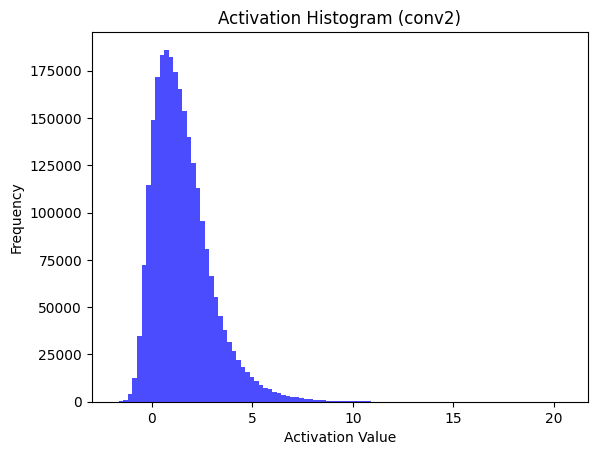

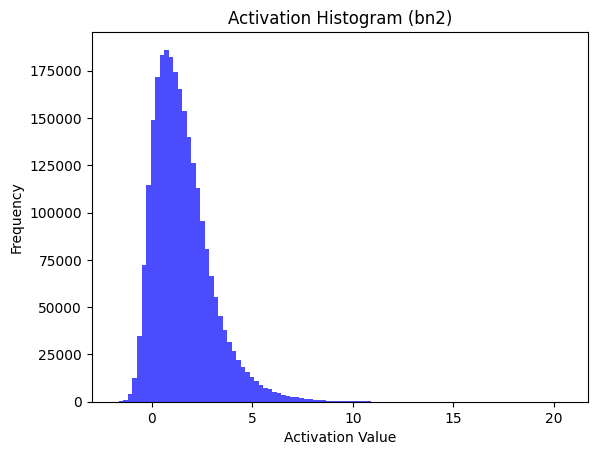

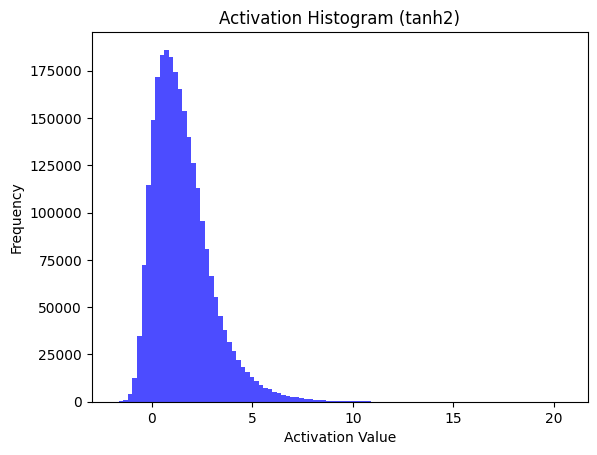

Total Convolutional Layer Weights: 437920
Total Fully Connected Layer Weights: 265482


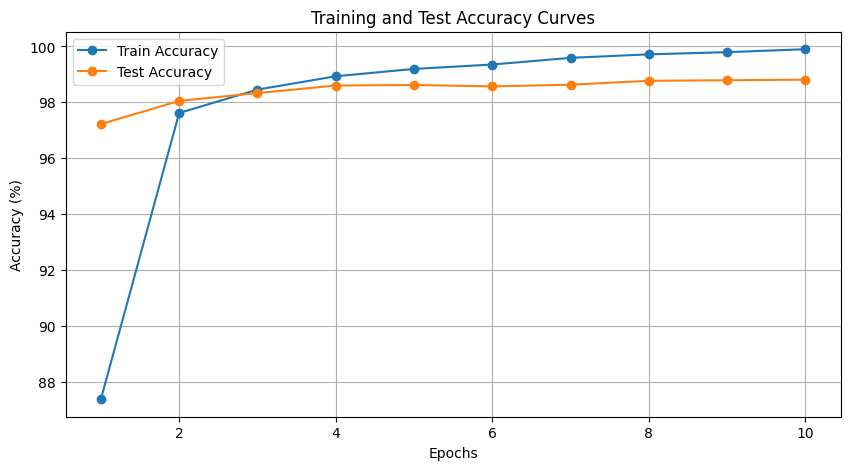

In [ ]:
#3.7.1
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model with Tanh activation and Batch Normalization
class SimpleNetWithTanhBN(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithTanhBN, self).__init__()
        self.kernel_sz = args['kernel_sz']
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh1", nn.Tanh())
        self.features.add_module("bn1", nn.BatchNorm2d(4))  # Batch Normalization after conv1
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv2, tanh2, bn2, pool2 (Second layer)
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh2", nn.Tanh())
        self.features.add_module("bn2", nn.BatchNorm2d(16))
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv3, tanh3, bn3, pool3 (Third layer)
        self.features.add_module("conv3", nn.Conv2d(16, 64, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh3", nn.Tanh())
        self.features.add_module("bn3", nn.BatchNorm2d(64))
        self.features.add_module("pool3", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv4, tanh4, bn4, pool4 (Fourth layer)
        self.features.add_module("conv4", nn.Conv2d(64, 256, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh4", nn.Tanh())
        self.features.add_module("bn4", nn.BatchNorm2d(256))
        self.features.add_module("pool4", nn.MaxPool2d(kernel_size=2, stride=2))

        # Adjust the input size for the linear layers
        self.fc1 = nn.Linear(1 * 1 * 256, 512)  # Adjusted input size
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)  # 10 output classes

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the models (with Tanh activation and Batch Normalization)
args = {'kernel_sz': 5}  # Set your desired kernel size here (e.g., 3, 5, 7)
net_with_tanh_bn = SimpleNetWithTanhBN(args)

# Define loss and optimizer for the model with Tanh activation and Batch Normalization
criterion = nn.CrossEntropyLoss()
optimizer_with_tanh_bn = optim.SGD(net_with_tanh_bn.parameters(), lr=0.001, momentum=0.9)

# Training loop for the model with Tanh activation and Batch Normalization
num_epochs = 10
conv2_l2_norms = []
train_accuracy_history = []
test_accuracy_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    hook_handle = net_with_tanh_bn.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_with_tanh_bn.zero_grad()

        outputs = net_with_tanh_bn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_with_tanh_bn.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_accuracy_history.append(train_accuracy)

    test_accuracy = evaluate_model(net_with_tanh_bn, testloader)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch {epoch+1}, Loss (with Tanh and BN): {running_loss / len(trainloader)}, Train Accuracy: {train_accuracy}%, Test Accuracy: {test_accuracy}%")
    hook_handle.remove()

# Evaluate the model with Tanh and BN on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

# Update testloader
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

test_accuracy_with_tanh_bn = evaluate_model(net_with_tanh_bn, testloader)

print("Test Accuracy (SimpleNet with Tanh and BN):", test_accuracy_with_tanh_bn)

# Create a dataloader for visualization (you can modify this as needed)
visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Plot histograms of activations after conv2, bn2, and tanh2 layers
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'conv2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'bn2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'tanh2')

# Report the number of weights in conv and fc layers
total_conv_weights = sum(p.numel() for p in net_with_tanh_bn.features.parameters())
total_fc_weights = sum(p.numel() for p in net_with_tanh_bn.fc1.parameters()) + sum(p.numel() for p in net_with_tanh_bn.fc2.parameters()) + sum(p.numel() for p in net_with_tanh_bn.fc3.parameters())

print(f"Total Convolutional Layer Weights: {total_conv_weights}")
print(f"Total Fully Connected Layer Weights: {total_fc_weights}")

# Plot training and test accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs+1), test_accuracy_history, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1, Loss (with Tanh and BN): 0.48614086125935635, Train Accuracy: 87.06833333333333%, Test Accuracy: 97.1%
Epoch 2, Loss (with Tanh and BN): 0.07972107106136647, Train Accuracy: 97.595%, Test Accuracy: 97.97%
Epoch 3, Loss (with Tanh and BN): 0.0520081153670167, Train Accuracy: 98.43666666666667%, Test Accuracy: 98.36%
Epoch 4, Loss (with Tanh and BN): 0.03657361944920933, Train Accuracy: 98.94333333333333%, Test Accuracy: 98.41%
Epoch 5, Loss (with Tanh and BN): 0.027567093791467434, Train Accuracy: 99.155%, Test Accuracy: 98.66%
Epoch 6, Loss (with Tanh and BN): 0.020690028843006244, Train Accuracy: 99.405%, Test Accuracy: 98.58%
Epoch 7, Loss (with Tanh and BN): 0.015236909535043548, Train Accuracy: 99.60833333333333%, Test Accuracy: 98.77%
Epoch 8, Loss (with Tanh and BN): 0.011024034650432123, Train Accuracy: 99.735%, Test Accuracy: 98.92%
Epoch 9, Loss (with Tanh and BN): 0.008429120744307732, Train Accuracy: 99.82%, Test Accuracy: 98.91%
Epoch 10, Loss (with Tanh and BN): 0

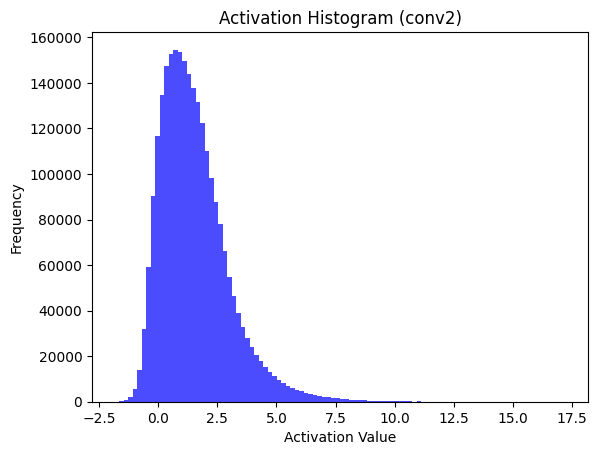

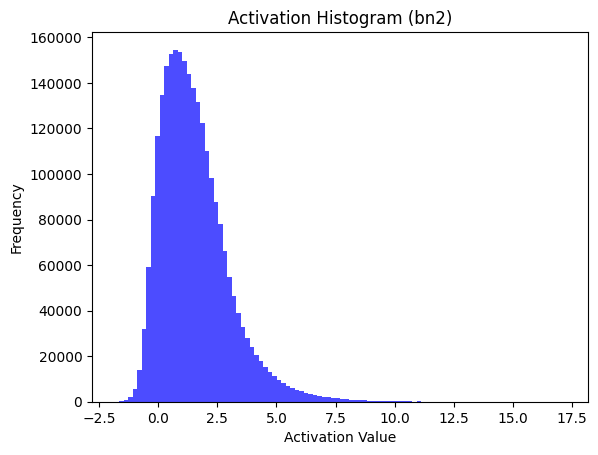

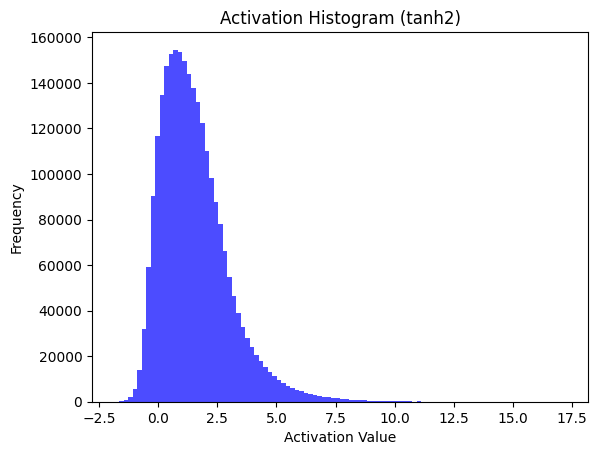

Total Convolutional Layer Weights: 437920
Total Fully Connected Layer Weights: 265482


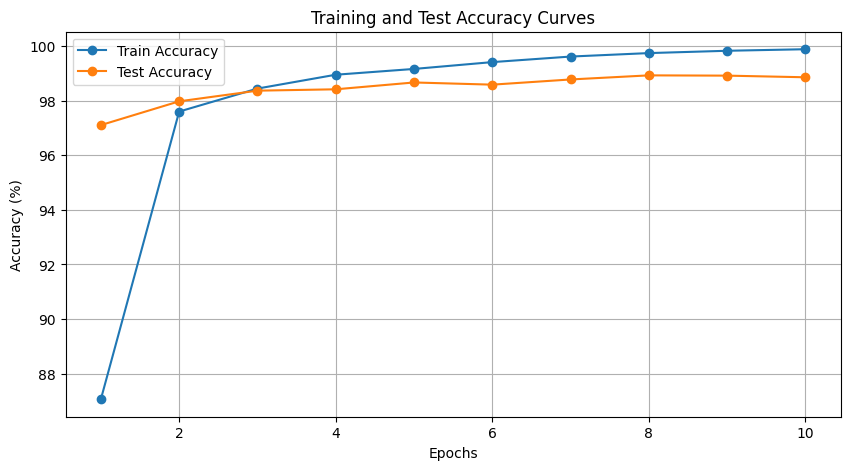

AttributeError: ignored

In [ ]:
#3.7.2
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model with Tanh activation and Batch Normalization
class SimpleNetWithTanhBN(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithTanhBN, self).__init__()
        self.kernel_sz = args['kernel_sz']
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh1", nn.Tanh())
        self.features.add_module("bn1", nn.BatchNorm2d(4))  # Batch Normalization after conv1
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv2, tanh2, bn2, pool2 (Second layer)
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh2", nn.Tanh())
        self.features.add_module("bn2", nn.BatchNorm2d(16))
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv3, tanh3, bn3, pool3 (Third layer)
        self.features.add_module("conv3", nn.Conv2d(16, 64, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh3", nn.Tanh())
        self.features.add_module("bn3", nn.BatchNorm2d(64))
        self.features.add_module("pool3", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv4, tanh4, bn4, pool4 (Fourth layer)
        self.features.add_module("conv4", nn.Conv2d(64, 256, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh4", nn.Tanh())
        self.features.add_module("bn4", nn.BatchNorm2d(256))
        self.features.add_module("pool4", nn.MaxPool2d(kernel_size=2, stride=2))

        # Adjust the input size for the linear layers
        self.fc1 = nn.Linear(1 * 1 * 256, 512)  # Adjusted input size
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)  # 10 output classes

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the models (with Tanh activation and Batch Normalization)
args = {'kernel_sz': 5}  # Set your desired kernel size here (e.g., 3, 5, 7)
net_with_tanh_bn = SimpleNetWithTanhBN(args)

# Define loss and optimizer for the model with Tanh activation and Batch Normalization
criterion = nn.CrossEntropyLoss()
optimizer_with_tanh_bn = optim.SGD(net_with_tanh_bn.parameters(), lr=0.001, momentum=0.9)

# Training loop for the model with Tanh activation and Batch Normalization
num_epochs = 10
conv2_l2_norms = []
train_accuracy_history = []
test_accuracy_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    hook_handle = net_with_tanh_bn.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_with_tanh_bn.zero_grad()

        outputs = net_with_tanh_bn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_with_tanh_bn.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_accuracy_history.append(train_accuracy)

    test_accuracy = evaluate_model(net_with_tanh_bn, testloader)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch {epoch+1}, Loss (with Tanh and BN): {running_loss / len(trainloader)}, Train Accuracy: {train_accuracy}%, Test Accuracy: {test_accuracy}%")
    hook_handle.remove()

# Evaluate the model with Tanh and BN on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

# Update testloader
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

test_accuracy_with_tanh_bn = evaluate_model(net_with_tanh_bn, testloader)

print("Test Accuracy (SimpleNet with Tanh and BN):", test_accuracy_with_tanh_bn)

# Create a dataloader for visualization (you can modify this as needed)
visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Plot histograms of activations after conv2, bn2, and tanh2 layers
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'conv2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'bn2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'tanh2')

# Report the number of weights in conv and fc layers
total_conv_weights = sum(p.numel() for p in net_with_tanh_bn.features.parameters())
total_fc_weights = sum(p.numel() for p in net_with_tanh_bn.fc1.parameters()) + sum(p.numel() for p in net_with_tanh_bn.fc2.parameters()) + sum(p.numel() for p in net_with_tanh_bn.fc3.parameters())

print(f"Total Convolutional Layer Weights: {total_conv_weights}")
print(f"Total Fully Connected Layer Weights: {total_fc_weights}")

# Plot training and test accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs+1), test_accuracy_history, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()
#3.7.1
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model with Tanh activation and Batch Normalization
import torch.nn as nn
…plt.grid(True)
plt.show()
#3.7.1
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model with Tanh activation and Batch Normalization
import torch.nn as nn
…plt.grid(True)
plt.show()


In [ ]:
#3.7.3 fail
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the ResidualBlock class
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size):
       super(ResidualBlock, self).__init__()
       self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=1, padding=kernel_size//2)
       self.bn1 = nn.BatchNorm2d(out_channels)
       self.relu1 = nn.ReLU()
       self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, stride=1, padding=kernel_size//2)
       self.bn2 = nn.BatchNorm2d(out_channels)
       self.relu2 = nn.ReLU()


    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += residual  # Add shortcut connection
        out = self.relu2(out)
        return out

# Define the SimpleNetWithResidual model
class SimpleNetWithResidual(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithResidual, self).__init__()
        self.kernel_sz = args['kernel_sz']
        self.features = nn.Sequential()

        # Create and add ResidualBlocks
        self.features.add_module("residual1", ResidualBlock(1, 4, self.kernel_sz))
        self.features.add_module("conv_to_match_channels", nn.Conv2d(4, 16, kernel_size=1, stride=1, padding=0))
        self.features.add_module("residual2", ResidualBlock(16, 16, self.kernel_sz))

        self.features.add_module("residual3", ResidualBlock(16, 64, self.kernel_sz))
        self.features.add_module("residual4", ResidualBlock(64, 256, self.kernel_sz))
        self.features.add_module("residual5", ResidualBlock(256, 128, self.kernel_sz))
        self.features.add_module("residual6", ResidualBlock(128, 64, self.kernel_sz))
        self.features.add_module("residual7", ResidualBlock(64, 32, self.kernel_sz))
        self.features.add_module("residual8", ResidualBlock(32, 16, self.kernel_sz))

        # Pooling layer after conv8
        self.pool8 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(16 * 4 * 4, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        out = self.features(x)
        out = self.pool8(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Define a new model that combines SimpleNetWithResidual (without SimpleNetWithTanhBN)
class CombinedModel(nn.Module):
    def __init__(self, args):
        super(CombinedModel, self).__init__()

        # Create an instance of SimpleNetWithResidual
        self.residual_model = SimpleNetWithResidual(args)

        # Specify which layers from SimpleNetWithResidual to use
        # For example, you can use the features up to the third residual block
        self.residual_layers = nn.Sequential(
            self.residual_model.features[0:3],  # Adjust the range as needed
        )

    def forward(self, x):
        # Forward pass through SimpleNetWithResidual model
        residual_out = self.residual_layers(x)

        return residual_out

# Load the MNIST dataset

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Modify the target transform to flatten the labels
target_transform = transforms.Compose([transforms.Lambda(lambda x: [x] if isinstance(x, int) else list(x))])
trainset.targets = target_transform(trainset.targets)
testset.targets = target_transform(testset.targets)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)



# ...（后续代码不变）...


# Initialize the combined model
args = {'kernel_sz': 5}  # Set your desired kernel size here (e.g., 3, 5, 7)
combined_model = CombinedModel(args)

# Define loss and optimizer for the combined model
criterion = nn.CrossEntropyLoss()
optimizer_combined = optim.SGD(combined_model.parameters(), lr=0.001, momentum=0.9)

# Training loop for the combined model
# Training loop for the combined model
num_epochs = 10
train_accuracy_history = []
test_accuracy_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_combined.zero_grad()

        outputs = combined_model(inputs)
        labels = torch.cat(labels)  # Convert labels to a one-dimensional tensor
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_combined.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_accuracy_history.append(train_accuracy)

    test_accuracy = evaluate_model(combined_model, testloader)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch {epoch+1}, Loss (Combined Model): {running_loss / len(trainloader)}, Train Accuracy: {train_accuracy}%, Test Accuracy: {test_accuracy}%")

# Evaluate the combined model on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

test_accuracy_combined = evaluate_model(combined_model, testloader)
print("Test Accuracy (Combined Model):", test_accuracy_combined)

# Plot training and test accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs+1), test_accuracy_history, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


TypeError: ignored

Test Accuracy (SimpleNet with Tanh and BN): 98.81


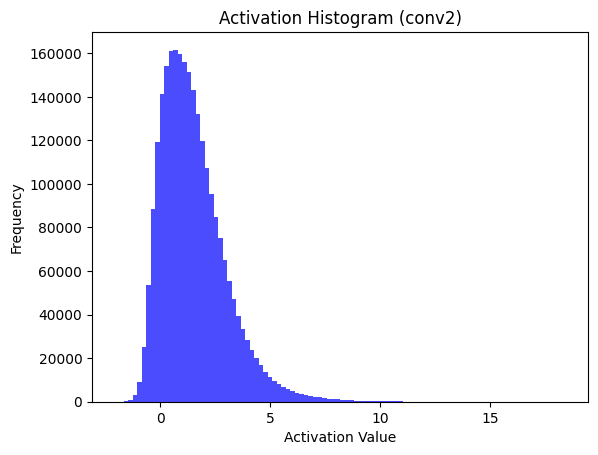

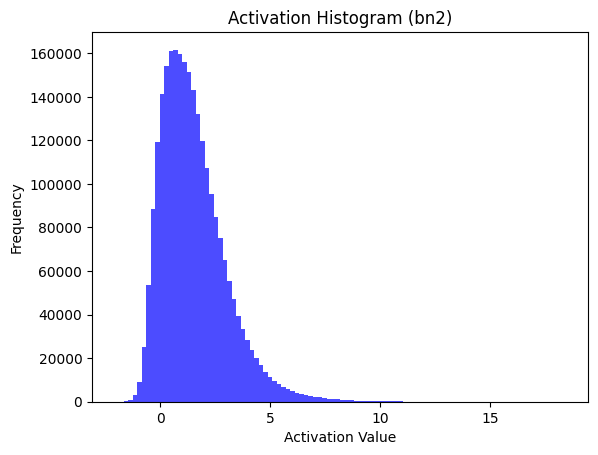

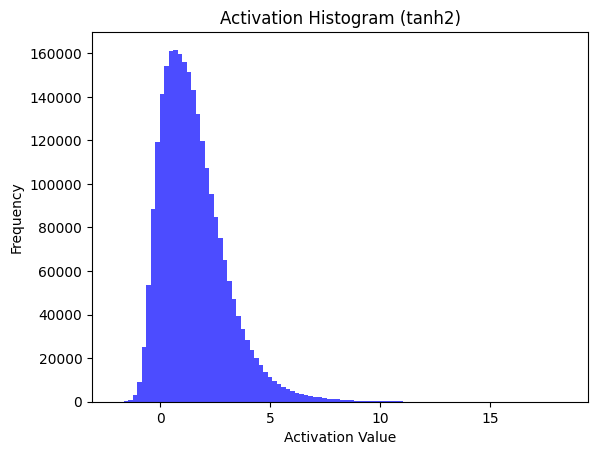

Total Convolutional Layer Weights: 437920
Total Fully Connected Layer Weights: 265482


ValueError: ignored

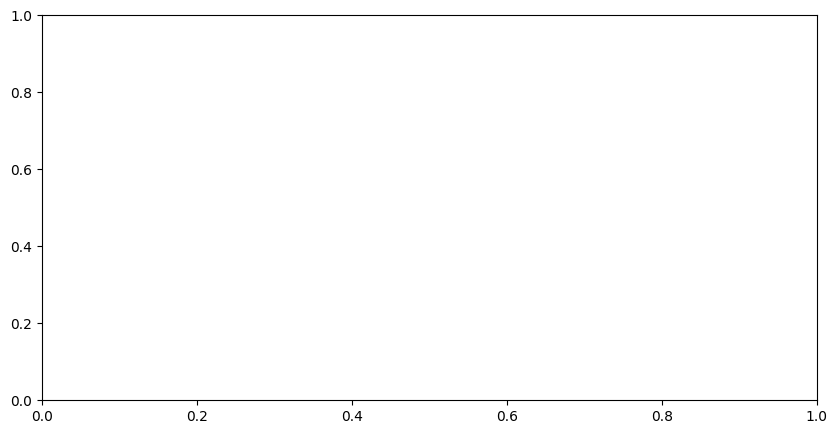

In [ ]:
#3.8
#3.8
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model with Tanh activation and Batch Normalization
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=1, padding=kernel_size//2)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=kernel_size, stride=1, padding=kernel_size//2)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu2 = nn.ReLU()

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += residual  # Add shortcut connection
        out = self.relu2(out)
        return out

class SimpleNetWithResidual(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithResidual, self).__init__()
        self.kernel_sz = args['kernel_sz']
        self.features = nn.Sequential()

        # Create and add ResidualBlocks
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh1", nn.Tanh())
        self.features.add_module("bn1", nn.BatchNorm2d(4))
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))

        self.features.add_module("residual1", ResidualBlock(4, 16, self.kernel_sz))
        self.features.add_module("tanh2", nn.Tanh())
        self.features.add_module("bn2", nn.BatchNorm2d(16))
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))

        self.features.add_module("residual2", ResidualBlock(16, 64, self.kernel_sz))
        self.features.add_module("tanh3", nn.Tanh())
        self.features.add_module("bn3", nn.BatchNorm2d(64))
        self.features.add_module("pool3", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv4, tanh4, bn4, pool4 (Fourth layer)
        self.features.add_module("conv4", nn.Conv2d(64, 256, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh4", nn.Tanh())
        self.features.add_module("bn4", nn.BatchNorm2d(256))
        self.features.add_module("pool4", nn.MaxPool2d(kernel_size=2, stride=2))

        # Adjust the input size for the linear layers
        self.fc1 = nn.Linear(1 * 1 * 256, 512)  # Adjusted input size
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)  # 10 output classes

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the models (with Tanh activation and Batch Normalization)
args = {'kernel_sz': 5}  # Set your desired kernel size here (e.g., 3, 5, 7)
net_with_tanh_bn = SimpleNetWithTanhBN(args)

# Define loss and optimizer for the model with Tanh activation and Batch Normalization
criterion = nn.CrossEntropyLoss()
optimizer_with_tanh_bn = optim.SGD(net_with_tanh_bn.parameters(), lr=0.001, momentum=0.9)

# Training loop for the model with Tanh activation and Batch Normalization
num_epochs = 10
conv2_l2_norms = []
train_accuracy_history = []
test_accuracy_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    hook_handle = net_with_tanh_bn.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_with_tanh_bn.zero_grad()

        outputs = net_with_tanh_bn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_with_tanh_bn.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

    train_accuracy = 100 * correct_train / total_train
    train_accuracy_history.append(train_accuracy)

    test_accuracy = evaluate_model(net_with_tanh_bn, testloader)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch {epoch+1}, Loss (with Tanh and BN): {running_loss / len(trainloader)}, Train Accuracy: {train_accuracy}%, Test Accuracy: {test_accuracy}%")
    hook_handle.remove()

# Evaluate the model with Tanh and BN on the test set


# Update testloader
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

test_accuracy_with_tanh_bn = evaluate_model(net_with_tanh_bn, testloader)

print("Test Accuracy (SimpleNet with Tanh and BN):", test_accuracy_with_tanh_bn)

# Create a dataloader for visualization (you can modify this as needed)
visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Plot histograms of activations after conv2, bn2, and tanh2 layers
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'conv2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'bn2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'tanh2')

# Report the number of weights in conv and fc layers
total_conv_weights = sum(p.numel() for p in net_with_tanh_bn.features.parameters())
total_fc_weights = sum(p.numel() for p in net_with_tanh_bn.fc1.parameters()) + sum(p.numel() for p in net_with_tanh_bn.fc2.parameters()) + sum(p.numel() for p in net_with_tanh_bn.fc3.parameters())

print(f"Total Convolutional Layer Weights: {total_conv_weights}")
print(f"Total Fully Connected Layer Weights: {total_fc_weights}")

# Plot training and test accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs+1), test_accuracy_history, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


Batch Size 32, Epoch 1, Loss (with Tanh and BN): 0.31442422650754454, Train Accuracy: 91.54833333333333%, Test Accuracy: 97.98%
Batch Size 32, Epoch 2, Loss (with Tanh and BN): 0.05853256289853404, Train Accuracy: 98.15666666666667%, Test Accuracy: 98.61%
Batch Size 32, Epoch 3, Loss (with Tanh and BN): 0.0378937098934936, Train Accuracy: 98.86666666666666%, Test Accuracy: 98.16%
Batch Size 32, Epoch 4, Loss (with Tanh and BN): 0.02631811229883072, Train Accuracy: 99.20833333333333%, Test Accuracy: 98.75%
Batch Size 32, Epoch 5, Loss (with Tanh and BN): 0.01770129639277002, Train Accuracy: 99.50333333333333%, Test Accuracy: 98.78%
Batch Size 32, Epoch 6, Loss (with Tanh and BN): 0.013294709481392056, Train Accuracy: 99.61166666666666%, Test Accuracy: 98.69%
Batch Size 32, Epoch 7, Loss (with Tanh and BN): 0.009264830490628567, Train Accuracy: 99.71166666666667%, Test Accuracy: 98.86%
Batch Size 32, Epoch 8, Loss (with Tanh and BN): 0.005664548528295321, Train Accuracy: 99.86%, Test Acc

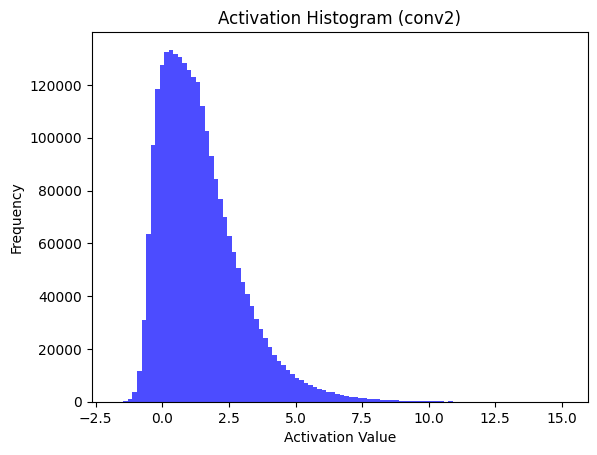

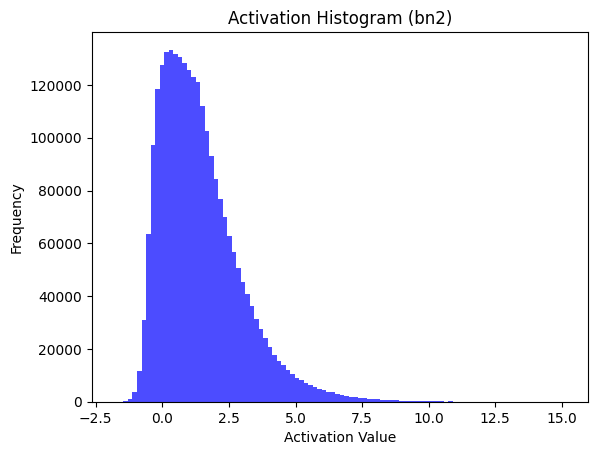

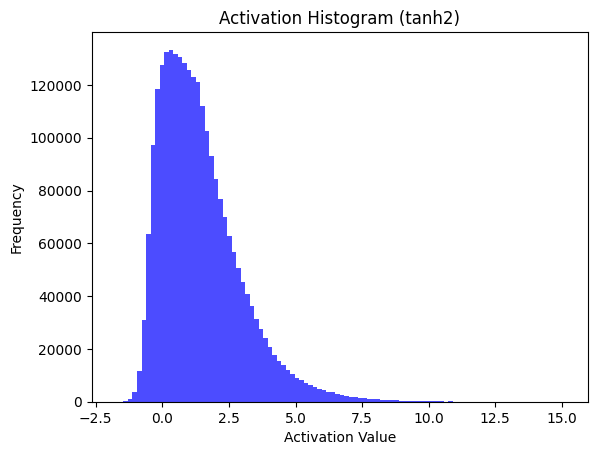

Total Convolutional Layer Weights: 437920
Total Fully Connected Layer Weights: 265482


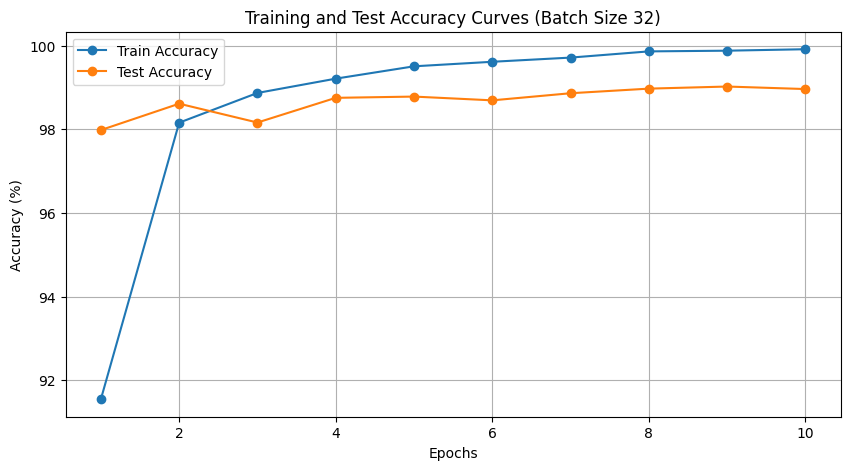

Batch Size 64, Epoch 1, Loss (with Tanh and BN): 0.4877309062119041, Train Accuracy: 87.36833333333334%, Test Accuracy: 97.05%
Batch Size 64, Epoch 2, Loss (with Tanh and BN): 0.07877543199160048, Train Accuracy: 97.61666666666666%, Test Accuracy: 98.2%
Batch Size 64, Epoch 3, Loss (with Tanh and BN): 0.05013062564560822, Train Accuracy: 98.47%, Test Accuracy: 98.36%
Batch Size 64, Epoch 4, Loss (with Tanh and BN): 0.03610621482719169, Train Accuracy: 98.89333333333333%, Test Accuracy: 98.7%
Batch Size 64, Epoch 5, Loss (with Tanh and BN): 0.026609208737648944, Train Accuracy: 99.22666666666667%, Test Accuracy: 98.51%
Batch Size 64, Epoch 6, Loss (with Tanh and BN): 0.01929395961202135, Train Accuracy: 99.435%, Test Accuracy: 98.89%
Batch Size 64, Epoch 7, Loss (with Tanh and BN): 0.015215978925381957, Train Accuracy: 99.57%, Test Accuracy: 98.85%
Batch Size 64, Epoch 8, Loss (with Tanh and BN): 0.01071889222173744, Train Accuracy: 99.75666666666666%, Test Accuracy: 98.91%
Batch Size 6

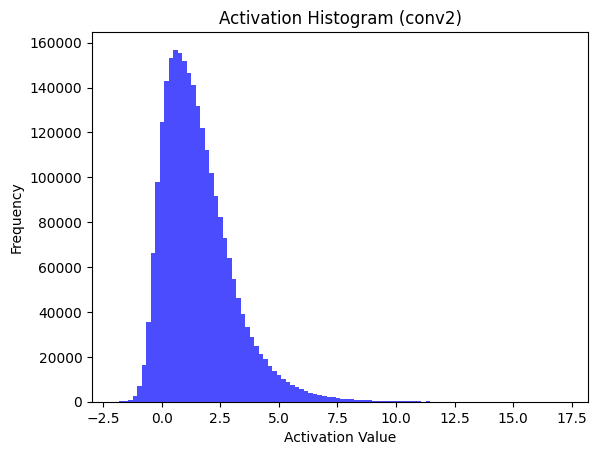

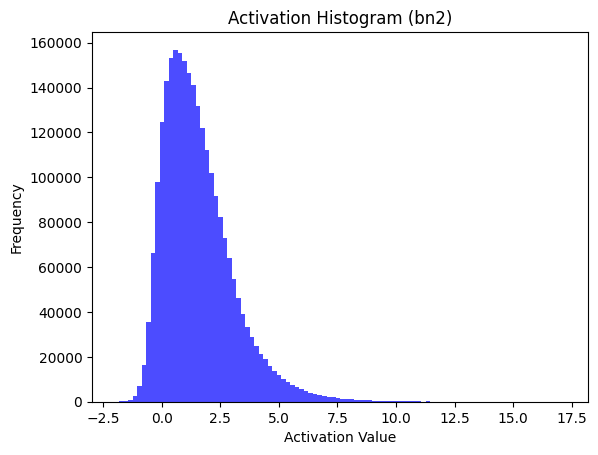

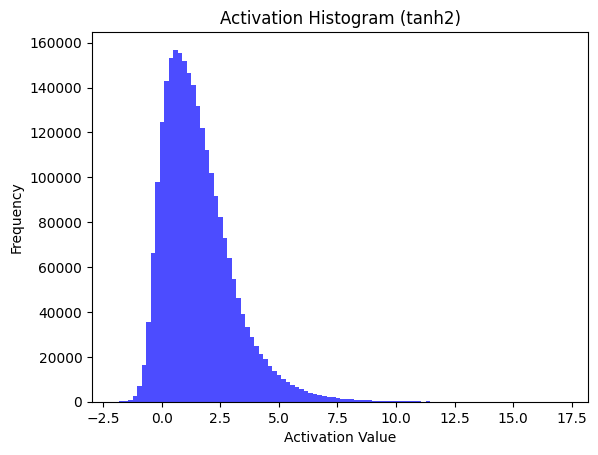

Total Convolutional Layer Weights: 437920
Total Fully Connected Layer Weights: 265482


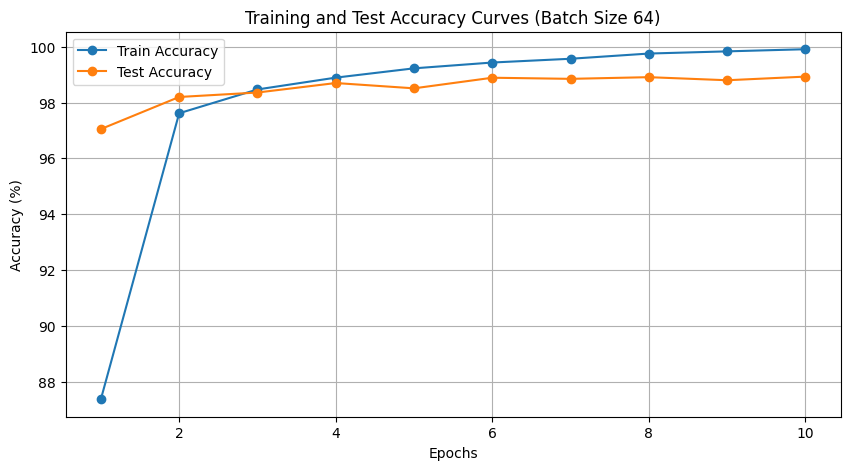

In [ ]:
#3.9.1
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model with Tanh activation and Batch Normalization
class SimpleNetWithTanhBN(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithTanhBN, self).__init__()
        self.kernel_sz = args['kernel_sz']
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh1", nn.Tanh())
        self.features.add_module("bn1", nn.BatchNorm2d(4))  # Batch Normalization after conv1
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv2, tanh2, bn2, pool2 (Second layer)
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh2", nn.Tanh())
        self.features.add_module("bn2", nn.BatchNorm2d(16))
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv3, tanh3, bn3, pool3 (Third layer)
        self.features.add_module("conv3", nn.Conv2d(16, 64, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh3", nn.Tanh())
        self.features.add_module("bn3", nn.BatchNorm2d(64))
        self.features.add_module("pool3", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv4, tanh4, bn4, pool4 (Fourth layer)
        self.features.add_module("conv4", nn.Conv2d(64, 256, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh4", nn.Tanh())
        self.features.add_module("bn4", nn.BatchNorm2d(256))
        self.features.add_module("pool4", nn.MaxPool2d(kernel_size=2, stride=2))

        # Adjust the input size for the linear layers
        self.fc1 = nn.Linear(1 * 1 * 256, 512)  # Adjusted input size
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)  # 10 output classes

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Modify batch sizes
batch_sizes = [32, 64]  # Different batch sizes to use

for batch_size in batch_sizes:
    # Create data loaders with the specified batch size
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

    # Initialize the models (with Tanh activation and Batch Normalization)
    args = {'kernel_sz': 5}  # Set your desired kernel size here (e.g., 3, 5, 7)
    net_with_tanh_bn = SimpleNetWithTanhBN(args)

    # Define loss and optimizer for the model with Tanh activation and Batch Normalization
    criterion = nn.CrossEntropyLoss()
    optimizer_with_tanh_bn = optim.SGD(net_with_tanh_bn.parameters(), lr=0.001, momentum=0.9)

    # Evaluate the model with Tanh and BN on the test set
    def evaluate_model(model, testloader):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_accuracy = 100 * correct / total
        return test_accuracy

    # Training loop for the model with Tanh activation and Batch Normalization
    num_epochs = 10
    conv2_l2_norms = []
    train_accuracy_history = []
    test_accuracy_history = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        hook_handle = net_with_tanh_bn.features.conv2.register_forward_hook(compute_conv2_l2_norm)
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer_with_tanh_bn.zero_grad()

            outputs = net_with_tanh_bn(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer_with_tanh_bn.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracy_history.append(train_accuracy)

        test_accuracy = evaluate_model(net_with_tanh_bn, testloader)
        test_accuracy_history.append(test_accuracy)

        print(f"Batch Size {batch_size}, Epoch {epoch+1}, Loss (with Tanh and BN): {running_loss / len(trainloader)}, Train Accuracy: {train_accuracy}%, Test Accuracy: {test_accuracy}%")
        hook_handle.remove()

    print(f"Test Accuracy (SimpleNet with Tanh and BN, Batch Size {batch_size}):", test_accuracy_history[-1])

    # Create a dataloader for visualization (you can modify this as needed)
    visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

    # Plot histograms of activations after conv2, bn2, and tanh2 layers
    plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'conv2')
    plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'bn2')
    plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'tanh2')

    # Report the number of weights in conv and fc layers
    total_conv_weights = sum(p.numel() for p in net_with_tanh_bn.features.parameters())
    total_fc_weights = sum(p.numel() for p in net_with_tanh_bn.fc1.parameters()) + sum(p.numel() for p in net_with_tanh_bn.fc2.parameters()) + sum(p.numel() for p in net_with_tanh_bn.fc3.parameters())

    print(f"Total Convolutional Layer Weights: {total_conv_weights}")
    print(f"Total Fully Connected Layer Weights: {total_fc_weights}")

    # Plot training and test accuracy curves
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs+1), train_accuracy_history, label='Train Accuracy', marker='o')
    plt.plot(range(1, num_epochs+1), test_accuracy_history, label='Test Accuracy', marker='o')
    plt.title(f'Training and Test Accuracy Curves (Batch Size {batch_size})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
#3.9.2
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the SimpleNet model with Tanh activation and Batch Normalization
class SimpleNetWithTanhBN(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithTanhBN, self).__init__()
        self.kernel_sz = args['kernel_sz']
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh1", nn.Tanh())
        self.features.add_module("bn1", nn.BatchNorm2d(4))  # Batch Normalization after conv1
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv2, tanh2, bn2, pool2 (Second layer)
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh2", nn.Tanh())
        self.features.add_module("bn2", nn.BatchNorm2d(16))
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv3, tanh3, bn3, pool3 (Third layer)
        self.features.add_module("conv3", nn.Conv2d(16, 64, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh3", nn.Tanh())
        self.features.add_module("bn3", nn.BatchNorm2d(64))
        self.features.add_module("pool3", nn.MaxPool2d(kernel_size=2, stride=2))

        # Add conv4, tanh4, bn4, pool4 (Fourth layer)
        self.features.add_module("conv4", nn.Conv2d(64, 256, kernel_size=self.kernel_sz, stride=1, padding=self.kernel_sz//2))
        self.features.add_module("tanh4", nn.Tanh())
        self.features.add_module("bn4", nn.BatchNorm2d(256))
        self.features.add_module("pool4", nn.MaxPool2d(kernel_size=2, stride=2))

        # Adjust the input size for the linear layers
        self.fc1 = nn.Linear(1 * 1 * 256, 512)  # Adjusted input size
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 10)  # 10 output classes

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Initialize the models (with Tanh activation and Batch Normalization)
args = {'kernel_sz': 5}  # Set your desired kernel size here (e.g., 3, 5, 7)

# Define learning rates to experiment with
learning_rates = [0.001, 0.01]

for learning_rate in learning_rates:
    # Initialize the model and optimizer
    net_with_tanh_bn = SimpleNetWithTanhBN(args)
    optimizer_with_tanh_bn = optim.SGD(net_with_tanh_bn.parameters(), lr=learning_rate, momentum=0.9)

    # Training loop
    num_epochs = 10
    conv2_l2_norms = []
    train_accuracy_history = []
    test_accuracy_history = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        hook_handle = net_with_tanh_bn.features.conv2.register_forward_hook(compute_conv2_l2_norm)
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer_with_tanh_bn.zero_grad()

            outputs = net_with_tanh_bn(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer_with_tanh_bn.step()

            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracy_history.append(train_accuracy)

        test_accuracy = evaluate_model(net_with_tanh_bn, testloader)
        test_accuracy_history.append(test_accuracy)

        print(f"Epoch {epoch+1}, Learning Rate: {learning_rate}, Loss (with Tanh and BN): {running_loss / len(trainloader)}, Train Accuracy: {train_accuracy}%, Test Accuracy: {test_accuracy}%")
        hook_handle.remove()

    # Print final test accuracy for this learning rate
    print(f"Final Test Accuracy (Learning Rate {learning_rate}): {test_accuracy_history[-1]}%\n")

# Evaluate the model with Tanh and BN on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

# Create a dataloader for visualization (you can modify this as needed)
visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Plot histograms of activations after conv2, bn2, and tanh2 layers
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'conv2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'bn2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'tanh2')

# Report the number of weights in conv and fc layers
total_conv_weights = sum(p.numel() for p in net_with_tanh_bn.features.parameters())
total_fc_weights = sum(p.numel() for p in net_with_tanh_bn.fc1.parameters()) + sum(p.numel() for p in net_with_tanh_bn.fc2.parameters()) + sum(p.numel() for p in net_with_tanh_bn.fc3.parameters())

print(f"Total Convolutional Layer Weights: {total_conv_weights}")
print(f"Total Fully Connected Layer Weights: {total_fc_weights}")

# Plot training and test accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, num_epochs+1), test_accuracy_history, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1, Learning Rate: 0.001, Loss (with Tanh and BN): 0.45926709832158935, Train Accuracy: 88.895%, Test Accuracy: 97.44%
Epoch 2, Learning Rate: 0.001, Loss (with Tanh and BN): 0.07520057710566755, Train Accuracy: 97.73833333333333%, Test Accuracy: 98.18%
Epoch 3, Learning Rate: 0.001, Loss (with Tanh and BN): 0.04880918926154293, Train Accuracy: 98.535%, Test Accuracy: 98.51%
Epoch 4, Learning Rate: 0.001, Loss (with Tanh and BN): 0.03445220568457118, Train Accuracy: 98.98166666666667%, Test Accuracy: 98.72%
Epoch 5, Learning Rate: 0.001, Loss (with Tanh and BN): 0.02576103272561385, Train Accuracy: 99.27166666666666%, Test Accuracy: 98.69%
Epoch 6, Learning Rate: 0.001, Loss (with Tanh and BN): 0.018907071341875133, Train Accuracy: 99.45833333333333%, Test Accuracy: 98.85%
Epoch 7, Learning Rate: 0.001, Loss (with Tanh and BN): 0.013693158983996114, Train Accuracy: 99.655%, Test Accuracy: 98.83%
Epoch 8, Learning Rate: 0.001, Loss (with Tanh and BN): 0.010354222876593412, Train Ac

KeyboardInterrupt: ignored

In [ ]:
!git clone https://BleuLime@bitbucket.org/mlhwcodesign/mlcodesign.git



Cloning into 'mlcodesign'...
Unpacking objects: 100% (6/6), 201.93 MiB | 18.68 MiB/s, done.


In [ ]:
!tar zxf ./mlcodesign/rm_dataset.tgz

In [ ]:
!pip install -U deepctr-torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/shenweichen/DeepCTR-Torch.git

Cloning into 'DeepCTR-Torch'...
remote: Enumerating objects: 1452, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (230/230), done.
remote: Total 1452 (delta 220), reused 203 (delta 118), pack-reused 1097
Receiving objects: 100% (1452/1452), 5.45 MiB | 25.62 MiB/s, done.
Resolving deltas: 100% (929/929), done.


In [ ]:
%cd DeepCTR-Torch/examples

/content/DeepCTR-Torch/examples


In [ ]:
!python run_classification_criteo.py

2023-09-24 04:14:35.308805: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 04:14:36.327276: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
cpu
Train on 128 samples, validate on 32 samples, 4 steps per epoch
Epoch 1/10
0s - loss:  0.6109 - binary_crossentropy:  0.6109 - auc:  0.5066 - val_binary_crossentropy:  0.5487 - val_auc:  0.4686
Epoch 2/10
0s - loss:  0.4932 - binary_crossentropy:  0.4932 - auc:  0.9366 - val_binary_crossentropy:  0.5458 - val_auc:  0.5029
Epoch 3/10
0s - loss:  0.3494 - binary_crossentropy:  0.3494 - auc:  0.9953 - val_binary_crossentropy:  0.5603 - val_auc:  0.5029
Epoch 4/10
0s - loss:  0.1821 - binary_crossentropy:  0.1821 - auc:  0.9987 - val_binary_crossentropy:  0.

Epoch 1, Loss (with Tanh and BN): 0.3807044691050739
Epoch 2, Loss (with Tanh and BN): 0.14920237226518931
Epoch 3, Loss (with Tanh and BN): 0.10623117998989025
Epoch 4, Loss (with Tanh and BN): 0.08710551337559404
Epoch 5, Loss (with Tanh and BN): 0.07472350125534655
Epoch 6, Loss (with Tanh and BN): 0.0661802818032621
Epoch 7, Loss (with Tanh and BN): 0.06010772664594387
Epoch 8, Loss (with Tanh and BN): 0.05523459192143002
Epoch 9, Loss (with Tanh and BN): 0.0515899518812532
Epoch 10, Loss (with Tanh and BN): 0.04805981580675371
Test Accuracy (SimpleNet with Tanh and BN): 98.42


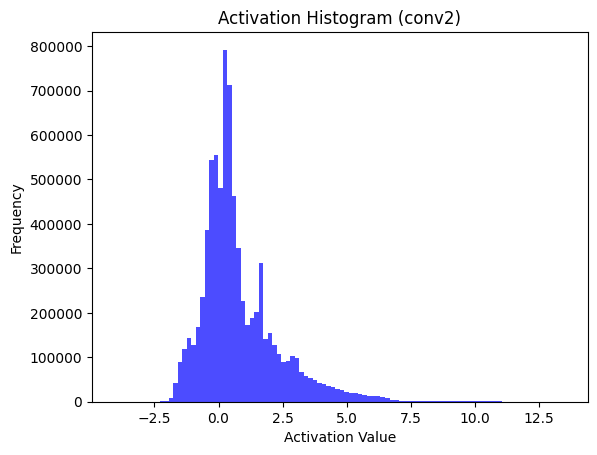

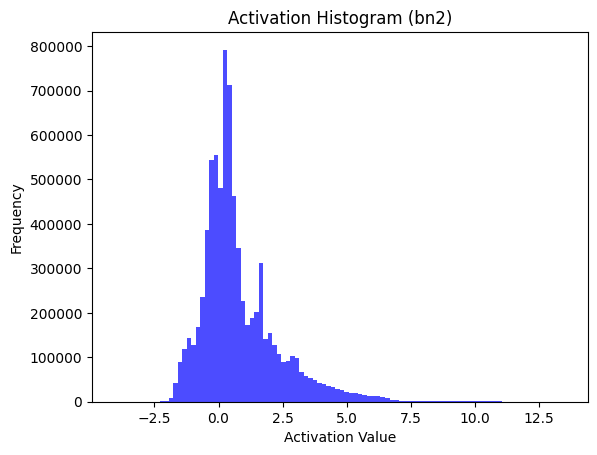

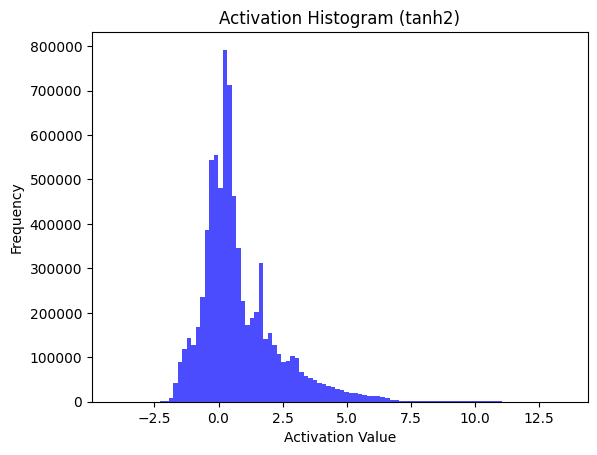

In [ ]:
#3.4
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the SimpleNet model with Tanh activation and Batch Normalization
class SimpleNetWithTanhBN(nn.Module):
    def __init__(self, args):
        super(SimpleNetWithTanhBN, self).__init__()
        self.features = nn.Sequential()
        self.features.add_module("conv1", nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1))
        self.features.add_module("tanh1", nn.Tanh())
        self.features.add_module("bn1", nn.BatchNorm2d(4))  # Batch Normalization after conv1
        self.features.add_module("pool1", nn.MaxPool2d(kernel_size=2, stride=2))
        self.features.add_module("conv2", nn.Conv2d(4, 16, kernel_size=3, stride=1, padding=1))
        self.features.add_module("tanh2", nn.Tanh())
        self.features.add_module("bn2", nn.BatchNorm2d(16))  # Batch Normalization after conv2
        self.features.add_module("pool2", nn.MaxPool2d(kernel_size=2, stride=2))
        self.lin1 = nn.Linear(7 * 7 * 16, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.lin1(out)
        return out

# Custom hook to compute L2 norm of 'conv2' layer weights
def compute_conv2_l2_norm(module, input, output):
    conv2_weights = module.weight
    l2_norm = torch.norm(conv2_weights, 2)  # Compute L2 norm
    conv2_l2_norms.append(l2_norm.item())

# Function to plot histograms of activations
def plot_activation_histograms(model, dataloader, layer_name):
    activations = []
    with torch.no_grad():
        for data in dataloader:
            images, _ = data
            activations_batch = model.features(images).detach().cpu().numpy()
            activations.extend(activations_batch.flatten())

    plt.hist(activations, bins=100, alpha=0.7, color='b')
    plt.title(f'Activation Histogram ({layer_name})')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Initialize the models (with Tanh activation and Batch Normalization)
net_with_tanh_bn = SimpleNetWithTanhBN(None)

# Define loss and optimizer for the model with Tanh activation and Batch Normalization
criterion = nn.CrossEntropyLoss()
optimizer_with_tanh_bn = optim.SGD(net_with_tanh_bn.parameters(), lr=0.001, momentum=0.9)

# Training loop for the model with Tanh activation and Batch Normalization
num_epochs = 10
conv2_l2_norms = []

for epoch in range(num_epochs):
    running_loss = 0.0
    hook_handle = net_with_tanh_bn.features.conv2.register_forward_hook(compute_conv2_l2_norm)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_with_tanh_bn.zero_grad()

        outputs = net_with_tanh_bn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_with_tanh_bn.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss (with Tanh and BN): {running_loss / len(trainloader)}")
    hook_handle.remove()

# Evaluate the model with Tanh and BN on the test set
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100 * correct / total
    return test_accuracy

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

test_accuracy_with_tanh_bn = evaluate_model(net_with_tanh_bn, testloader)

print("Test Accuracy (SimpleNet with Tanh and BN):", test_accuracy_with_tanh_bn)

# Create a dataloader for visualization (you can modify this as needed)
visualization_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Plot histograms of activations after conv2, bn2, and tanh2 layers
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'conv2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'bn2')
plot_activation_histograms(net_with_tanh_bn, visualization_dataloader, 'tanh2')
